In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [61]:
data = pd.read_csv("C:/Users/olive/Desktop/ARIMAX/ARIMAX/Dengue cases.csv")
print(data)

    Year  Dengue_Cases  Temperature  Precipitation
0   1990        104456        26.16        2471.01
1   1991        110930        26.17        2029.52
2   1992        117681        26.05        1940.57
3   1993        124590        26.15        2330.48
4   1994        131524        26.27        2241.87
5   1995        138396        26.13        2731.10
6   1996        145202        26.00        2555.56
7   1997        152174        26.12        2060.66
8   1998        159804        26.76        2216.31
9   1999        168230        26.18        3355.78
10  2000        178241        26.32        3149.56
11  2001        192174        26.34        2831.99
12  2002        211703        26.22        2426.60
13  2003        236257        26.07        2738.26
14  2004        265048        26.17        2456.70
15  2005        297071        26.27        2534.85
16  2006        347083        26.32        2539.56
17  2007        420289        26.34        2754.81
18  2008        499683        2

In [62]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

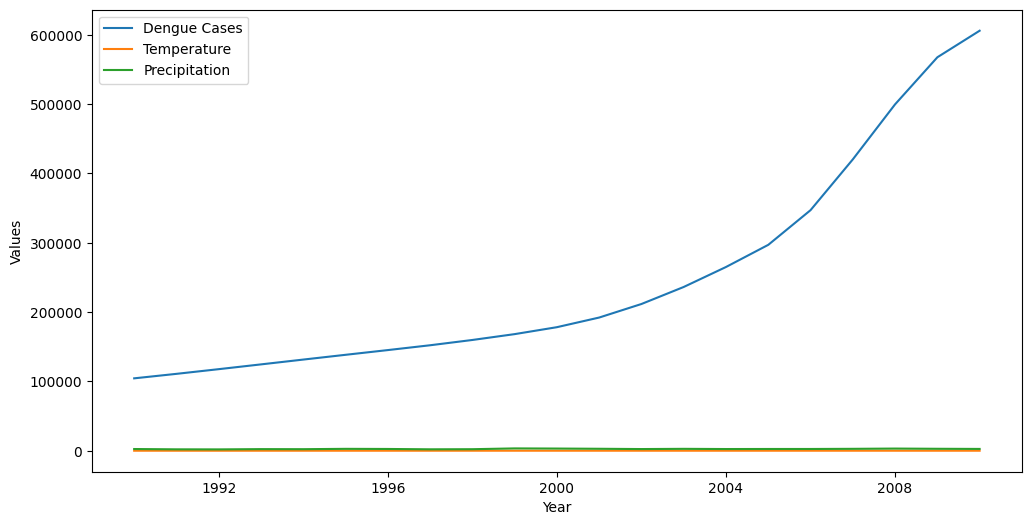

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Dengue_Cases'], label='Dengue Cases')
plt.plot(data.index, data['Temperature'], label='Temperature')
plt.plot(data.index, data['Precipitation'], label='Precipitation')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

#ADF test for Marketing series
adm = sm.tsa.stattools.adfuller(data['Temperature'])
print('ADF Statistic for Temperature: %f' % adm[0])
print('p-value: %f' % adm[1])
print('Critical Values:')
for key, value in adm[4].items():
    print('\t%s: %.3f' % (key, value))
    


ADF Statistic for Temperature: -4.179811
p-value: 0.000713
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651


In [69]:
adm = sm.tsa.stattools.adfuller(data['Dengue_Cases'])
print('ADF Statistic for Dengue_Cases: %f' % adm[0])
print('p-value: %f' % adm[1])
print('Critical Values:')
for key, value in adm[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Dengue_Cases: 3.376629
p-value: 1.000000
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


In [70]:
adm = sm.tsa.stattools.adfuller(data['Precipitation'])
print('ADF Statistic for Precipitation: %f' % adm[0])
print('p-value: %f' % adm[1])
print('Critical Values:')
for key, value in adm[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic for Precipitation: -5.863884
p-value: 0.000000
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714


In [76]:
data['const']=1
endog = data['Dengue_Cases']
exog = data[['Temperature', 'Precipitation', 'const']]

# Fit the OLS model
model1 = sm.OLS(endog, exog)
results1 = model1.fit()

# Print the summary of the model
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:           Dengue_Cases   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.609
Date:                Wed, 15 Jan 2025   Prob (F-statistic):              0.228
Time:                        11:29:10   Log-Likelihood:                -278.44
No. Observations:                  21   AIC:                             562.9
Df Residuals:                      18   BIC:                             566.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Temperature   -6121.8340   2.06e+05     -0.030